## ANOVA
- https://support.minitab.com/en-us/minitab/21/help-and-how-to/statistical-modeling/anova/how-to/one-way-anova/interpret-the-results/key-results/
- https://www.reneshbedre.com/blog/anova.html




## ANOVA + TUKEY
- https://towardsdatascience.com/anova-tukey-test-in-python-b3082b6e6bda
- https://blog.4dcu.be/programming/2021/12/30/Posthoc-Statannotations.html

In [200]:
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats import f_oneway
from scikit_posthocs import posthoc_tukey





DATA_PATH = 'data/dados_para_teste.csv'
METRIC = 'Test accuracy'

In [116]:
data = pd.read_csv(path.join('..', DATA_PATH))
data.head()

,n,classifier,cnn,Training accuracy,Test accuracy,Training recall,Test recall,Training precision,Test precision,Training f1 Score,Test f1 Score
0,0,RANDON FOREST,inceptionv3,99.0,97.32,100.0,96.44,97.29,96.29,95.0,96.0
1,1,RANDON FOREST,inceptionv3,100.0,97.32,98.0,98.44,97.29,98.29,99.0,98.0
2,2,RANDON FOREST,inceptionv3,100.0,97.32,100.0,97.44,97.29,97.29,97.0,97.0
3,3,RANDON FOREST,inceptionv3,100.0,97.32,99.0,97.94,97.29,97.79,98.0,97.5
4,4,RANDON FOREST,inceptionv3,99.5,97.32,100.0,96.94,97.29,96.79,96.0,96.5


In [117]:
data.shape

(10400, 11)

<AxesSubplot: >

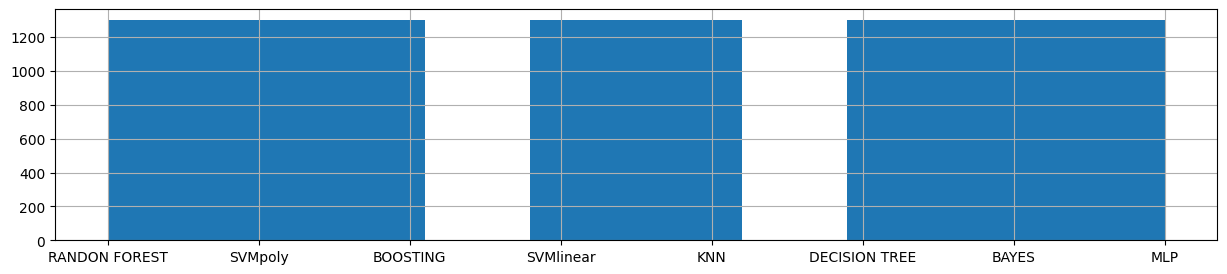

In [118]:
plt.figure(figsize=(15,3))
data['classifier'].hist()

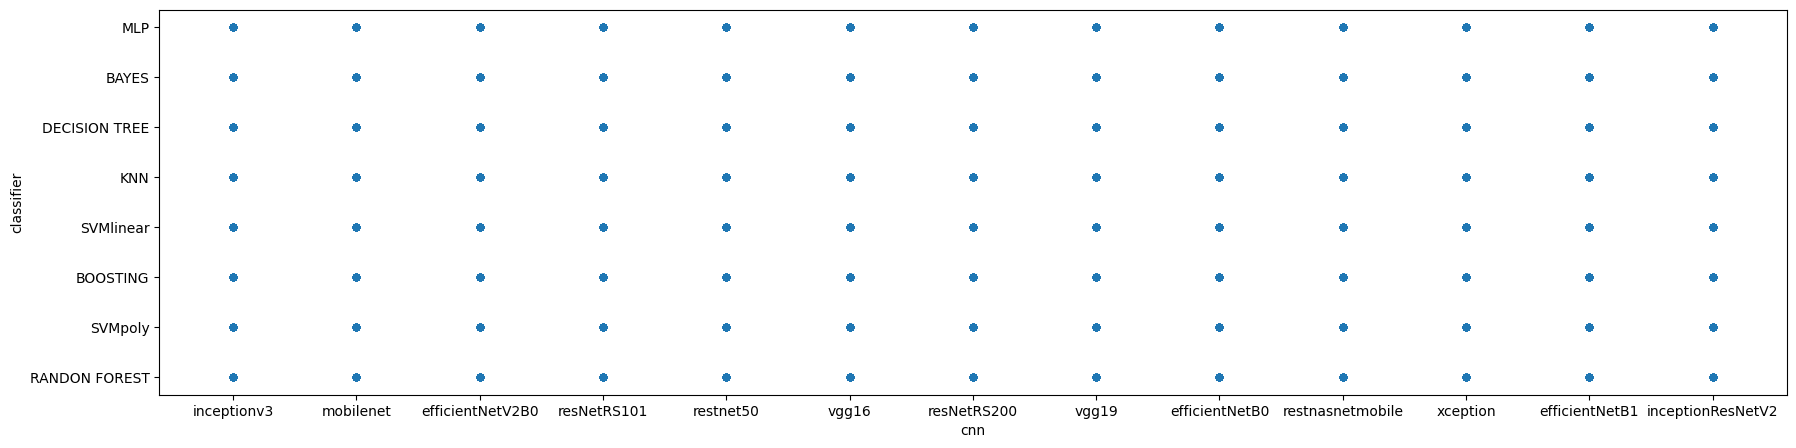

In [119]:
ax = data.plot(x='cnn', y='classifier', kind='scatter')
fig = plt.gcf()
fig.set_size_inches(21, 5)

In [120]:
groups_cnn = data.groupby('cnn')
groups_cnn.groups.keys()

dict_keys(['efficientNetB0', 'efficientNetB1', 'efficientNetV2B0', 'inceptionResNetV2', 'inceptionv3', 'mobilenet', 'resNetRS101', 'resNetRS200', 'restnasnetmobile', 'restnet50', 'vgg16', 'vgg19', 'xception'])

In [121]:
grousp_clf = groups_cnn.get_group('inceptionv3').groupby('classifier')
grousp_clf.groups.keys()

dict_keys(['BAYES', 'BOOSTING', 'DECISION TREE', 'KNN', 'MLP', 'RANDON FOREST', 'SVMlinear', 'SVMpoly'])

In [ ]:
f_value, p_value = f_oneway(*(grousp_clf.get_group(group)['Test accuracy'] for group in grousp_clf.groups.keys()))

In [198]:
import pandas as pd
from scipy.stats import f_oneway

def one_way_anova(*groups):
    # Perform one-way ANOVA
    f_value, p_value = f_oneway(*groups)

    # Calculate SS, DF, and MS
    n_groups = len(groups)
    total_ss = sum(sum(group) ** 2 for group in groups) - sum(sum(group) for group in groups) ** 2 / sum(len(group) for group in groups)
    ss_between = sum(sum(group) ** 2 / len(group) for group in groups) - sum(sum(group) for group in groups) ** 2 / sum(len(group) for group in groups)
    ss_within = total_ss - ss_between
    df_between = n_groups - 1
    df_within = sum(len(group) for group in groups) - n_groups
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within

    # Create a DataFrame to store the results
    results_df = pd.DataFrame({
        'Source of Variation': ['Between Groups', 'Within Groups', 'Total'],
        'Sum of Squares (SS)': [ss_between, ss_within, total_ss],
        'Degrees of Freedom (DF)': [df_between, df_within, df_between + df_within],
        'Mean Squares (MS)': [ms_between, ms_within, None],
        'F-value': [f_value, None, None],
        'p-value': [p_value, None, None]
    })

    return results_df

# Sample data
group1 = [1, 2, 3, 4, 5]
group2 = [6, 7, 8, 9, 10]
group3 = [11, 12, 13, 14, 15]

# Perform one-way ANOVA with variable number of groups
anova_results = one_way_anova(group1, group2, group3)

# Display the results
anova_results


,Source of Variation,Sum of Squares (SS),Degrees of Freedom (DF),Mean Squares (MS),F-value,p-value
0,Between Groups,250.0,2,125.000000,50.0,0.000002
1,Within Groups,4840.0,12,403.333333,NaN,NaN
2,Total,5090.0,14,NaN,NaN,NaN


In [199]:
anova_results = one_way_anova(*(grousp_clf.get_group(group)['Test accuracy'] for group in grousp_clf.groups.keys()))
anova_results

,Source of Variation,Sum of Squares (SS),Degrees of Freedom (DF),Mean Squares (MS),F-value,p-value
0,Between Groups,6.888674e+04,7,9840.962679,42824.409019,0.0
1,Within Groups,5.528724e+08,792,698071.206250,NaN,NaN
2,Total,5.529413e+08,799,NaN,NaN,NaN


In [196]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Source of Variation': ['Between Groups'],
    'Sum of Squares (SS)': [None],
    'Degrees of Freedom (DF)': [None],
    'Mean Squares (MS)': [None],
    'F-value': [f_value],
    'p-value': [p_value]
})

# Display the results
results_df

,Source of Variation,Sum of Squares (SS),Degrees of Freedom (DF),Mean Squares (MS),F-value,p-value
0,Between Groups,None,None,None,42824.409019,0.0


In [123]:
def plot_anova_results(*groups):
    # Perform one-way ANOVA
    f_value, p_value = f_oneway(*groups)

    # Prepare data for plotting
    group_names = [f'Group {i+1}' for i in range(len(groups))]
    group_means = [group.mean() for group in groups]

    # Plot the means
    plt.bar(group_names, group_means)

    # Add labels and title
    plt.xlabel('Groups')
    plt.ylabel('Means')
    plt.title('ANOVA Results')

    # Add ANOVA result text
    plt.text(len(groups) // 2, max(group_means) * 0.9, f'F-value: {f_value:.2f}\np-value: {p_value:.4f}',
             ha='center', va='center', fontsize=12)

    # Show the plot
    plt.show()

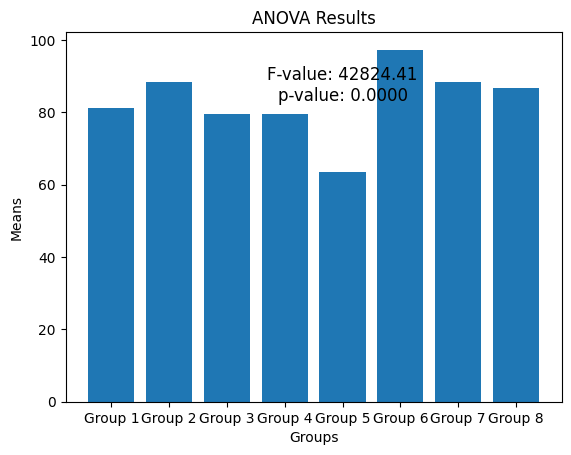

In [124]:
plot_anova_results(*(grousp_clf.get_group(group)['Test accuracy'] for group in grousp_clf.groups.keys()))

In [125]:
tukey_df = posthoc_tukey(groups_cnn.get_group('inceptionv3'), val_col="Test accuracy", group_col="classifier")
tukey_df

,RANDON FOREST,SVMlinear,BOOSTING,SVMpoly,BAYES,KNN,DECISION TREE,MLP
RANDON FOREST,1.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001
SVMlinear,0.001,1.000,0.900,0.001,0.001,0.001,0.001,0.001
BOOSTING,0.001,0.900,1.000,0.001,0.001,0.001,0.001,0.001
SVMpoly,0.001,0.001,0.001,1.000,0.001,0.001,0.001,0.001
BAYES,0.001,0.001,0.001,0.001,1.000,0.001,0.001,0.001
KNN,0.001,0.001,0.001,0.001,0.001,1.000,0.900,0.001
DECISION TREE,0.001,0.001,0.001,0.001,0.001,0.900,1.000,0.001
MLP,0.001,0.001,0.001,0.001,0.001,0.001,0.001,1.000


In [126]:
remove = np.tril(np.ones(tukey_df.shape), k=0).astype("bool")
tukey_df[remove] = np.nan

molten_df = tukey_df.melt(ignore_index=False).reset_index().dropna()
molten_df

,index,variable,value
8,RANDON FOREST,SVMlinear,0.001
16,RANDON FOREST,BOOSTING,0.001
17,SVMlinear,BOOSTING,0.900
24,RANDON FOREST,SVMpoly,0.001
25,SVMlinear,SVMpoly,0.001
26,BOOSTING,SVMpoly,0.001
32,RANDON FOREST,BAYES,0.001
33,SVMlinear,BAYES,0.001
34,BOOSTING,BAYES,0.001
35,SVMpoly,BAYES,0.001


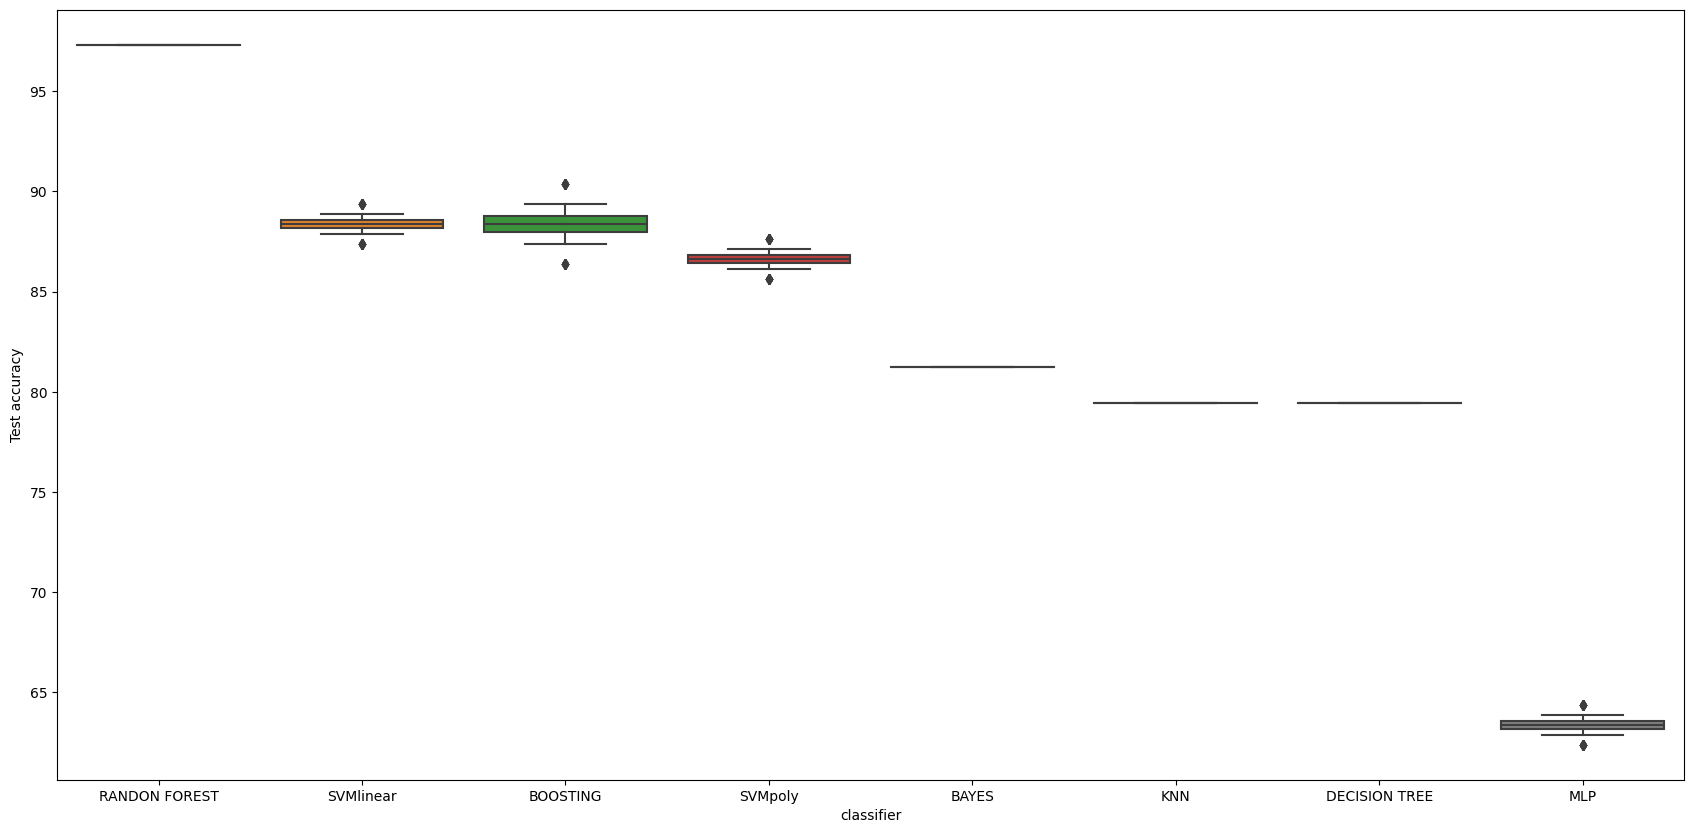

In [132]:
ax = sns.boxplot(data=groups_cnn.get_group('inceptionv3'), x="classifier", y="Test accuracy")
fig = plt.gcf()
fig.set_size_inches(21, 10)

In [160]:
sorted_models = groups_cnn.get_group('inceptionv3').groupby('classifier').agg(['mean'])['Test accuracy', 'mean'].sort_values(ascending=False)
best_model_name = sorted_models.index[0]

/var/folders/ps/5qcytqmx7hg8zh519n1y12rm0000gn/T/ipykernel_25118/3144959028.py:1: FutureWarning: ['cnn'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  sorted_models = groups_cnn.get_group('inceptionv3').groupby('classifier').agg(['mean'])['Test accuracy', 'mean'].sort_values(ascending=False)


In [186]:
filter_list = [('inceptionv3', best_model_name), ('restnet50', 'MLP'), ('vgg16', 'MLP')]
filter_list

[('inceptionv3', 'RANDON FOREST'), ('restnet50', 'MLP'), ('vgg16', 'MLP')]

In [187]:
filtered_data = data[data.apply(lambda row: tuple(row[['cnn', 'classifier']]), axis=1).isin(filter_list)]
filtered_data


,n,classifier,cnn,Training accuracy,Test accuracy,Training recall,Test recall,Training precision,Test precision,Training f1 Score,Test f1 Score
0,0,RANDON FOREST,inceptionv3,99.0,97.32,100.0,96.44,97.29,96.29,95.0,96.0
1,1,RANDON FOREST,inceptionv3,100.0,97.32,98.0,98.44,97.29,98.29,99.0,98.0
2,2,RANDON FOREST,inceptionv3,100.0,97.32,100.0,97.44,97.29,97.29,97.0,97.0
3,3,RANDON FOREST,inceptionv3,100.0,97.32,99.0,97.94,97.29,97.79,98.0,97.5
4,4,RANDON FOREST,inceptionv3,99.5,97.32,100.0,96.94,97.29,96.79,96.0,96.5
...,...,...,...,...,...,...,...,...,...,...,...
10395,10395,MLP,restnet50,78.0,81.00,78.0,79.00,82.00,81.00,79.0,79.0
10396,10396,MLP,restnet50,80.0,81.00,81.0,79.00,79.00,81.00,81.0,81.0
10397,10397,MLP,restnet50,79.0,78.00,82.0,79.00,81.00,79.00,80.0,81.0
10398,10398,MLP,restnet50,79.0,79.00,78.0,79.00,79.00,79.00,80.0,79.0


In [188]:
tukey_df = posthoc_tukey(filtered_data, val_col="Test accuracy", group_col="cnn")
tukey_df

,inceptionv3,vgg16,restnet50
inceptionv3,1.000,0.001000,0.001000
vgg16,0.001,1.000000,0.300946
restnet50,0.001,0.300946,1.000000


In [189]:
tukey_test = pairwise_tukeyhsd(filtered_data['Test accuracy'], filtered_data['cnn'])
tukey_test._results_table

group1,group2,meandiff,p-adj,lower,upper,reject
inceptionv3,restnet50,-17.42,0.0,-17.7376,-17.1024,True
inceptionv3,vgg16,-17.62,0.0,-17.9376,-17.3024,True
restnet50,vgg16,-0.2,0.3004,-0.5176,0.1176,False


In [190]:
df = pd.DataFrame(data=tukey_test._results_table.data[1:], columns=tukey_test._results_table.data[0])
df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,inceptionv3,restnet50,-17.42,0.0000,-17.7376,-17.1024,True
1,inceptionv3,vgg16,-17.62,0.0000,-17.9376,-17.3024,True
2,restnet50,vgg16,-0.20,0.3004,-0.5176,0.1176,False
